In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_excel("flight_train.xlsx")

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Handling numerical data

In [ ]:
date = df['Date_of_Journey'].str.split('/').str[0]
month = df['Date_of_Journey'].str.split('/').str[1]
year = df['Date_of_Journey'].str.split('/').str[2]

In [ ]:
df['Date'] = date
df['Month'] = month
df['Year'] = year

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [ ]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [ ]:
def hour(x):
    return int(x.split(' ')[0][0:-1])

def minutes(x):
    if x is None or len(x.split(' ')) < 2:
        return 0
    return int(x.split(' ')[1][0:-1])

In [ ]:
hour=df['Duration'].apply(hour)

In [ ]:
minutes=df['Duration'].apply(minutes)

In [ ]:
duration = hour.astype(int) * 60 + minutes.astype(int)

In [ ]:
df["Duration"]=duration

In [ ]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,01,03,2019


In [ ]:
df["Arrival_Time"]=df["Arrival_Time"].str.split(" ").str[0]

In [ ]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [ ]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,170,0,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,1140,2,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302,01,03,2019


In [ ]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
df['Additional_Info'] = df['Additional_Info'].map({
    'No info': 0,
    'No Info': 0,
    'In-flight meal not included': 1,
    'No check-in baggage included': 2,
    '1 Long layover': 3,
    'Business class': 4,
    'Change airports': 5,
    '1 Short layover': 7,
    'Red-eye flight': 8,
    '2 Long layover': 9
})


In [ ]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,170,0,0,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,0,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,1140,2,0,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,0,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,0,13302,01,03,2019


In [ ]:
df["Arrival_hour"]=df["Arrival_Time"].str.split(":").str[0]
df["Arrival_minutes"]=df["Arrival_Time"].str.split(":").str[1]
df["Departure_hour"]=df["Dep_Time"].str.split(":").str[0]
df["Departure_minutes"]=df["Dep_Time"].str.split(":").str[1]

In [ ]:
df.drop(["Arrival_Time","Dep_Time"],axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,0,3897,24,03,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,0,7662,1,05,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,0,13882,9,06,2019,04,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,0,6218,12,05,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,0,13302,01,03,2019,21,35,16,50


Handling categorical data

In [ ]:
df.drop("Route", axis=1, inplace=True)

In [ ]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes
0,IndiGo,Banglore,New Delhi,170,0,0,3897,24,03,2019,01,10,22,20
1,Air India,Kolkata,Banglore,445,2,0,7662,1,05,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,1140,2,0,13882,9,06,2019,04,25,09,25
3,IndiGo,Kolkata,Banglore,325,1,0,6218,12,05,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,285,1,0,13302,01,03,2019,21,35,16,50


In [ ]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

# Apply label encoding to "Source" column
df['Source'] = label_encoder.fit_transform(df['Source'])

# Apply label encoding to "Destination" column
df['Destination'] = label_encoder.fit_transform(df['Destination'])

In [ ]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes
0,IndiGo,0,5,170,0,0,3897,24,03,2019,01,10,22,20
1,Air India,3,0,445,2,0,7662,1,05,2019,13,15,05,50
2,Jet Airways,2,1,1140,2,0,13882,9,06,2019,04,25,09,25
3,IndiGo,3,0,325,1,0,6218,12,05,2019,23,30,18,05
4,IndiGo,0,5,285,1,0,13302,01,03,2019,21,35,16,50


In [ ]:
# Apply one-hot encoding to "Airline" column
Airline = pd.get_dummies(df['Airline'], prefix='Airline')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, Airline], axis=1)

# Drop the original "Airline" column if needed
df = df.drop('Airline', axis=1)

In [ ]:
df.head()

,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,5,170,0,0,3897,24,03,2019,01,...,0,1,0,0,0,0,0,0,0,0
1,3,0,445,2,0,7662,1,05,2019,13,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1140,2,0,13882,9,06,2019,04,...,0,0,1,0,0,0,0,0,0,0
3,3,0,325,1,0,6218,12,05,2019,23,...,0,1,0,0,0,0,0,0,0,0
4,0,5,285,1,0,13302,01,03,2019,21,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.isnull().sum()

Source                                       0
Destination                                  0
Duration                                     0
Total_Stops                                  0
Additional_Info                              0
Price                                        0
Date                                         0
Month                                        0
Year                                         0
Arrival_hour                                 0
Arrival_minutes                              0
Departure_hour                               0
Departure_minutes                            0
Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_Spice

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['Date', 'Month', 'Year', 'Arrival_hour', 'Arrival_minutes', 'Departure_hour', 'Departure_minutes']:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
X=df.drop('Price',axis=1)
y=df['Price']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Source                                     10682 non-null  int64
 1   Destination                                10682 non-null  int64
 2   Duration                                   10682 non-null  int64
 3   Total_Stops                                10682 non-null  int64
 4   Additional_Info                            10682 non-null  int64
 5   Date                                       10682 non-null  int64
 6   Month                                      10682 non-null  int64
 7   Year                                       10682 non-null  int64
 8   Arrival_hour                               10682 non-null  int64
 9   Arrival_minutes                            10682 non-null  int64
 10  Departure_hour                             106

Creating model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

In [ ]:
import warnings

# Ignore info messages
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [ ]:
X_train.shape

(8545, 24)

In [ ]:
y_train.shape

(8545,)

In [ ]:
y_test

10435     8996
8619     15400
6445     10844
3159      4423
9866     13339
         ...  
9630      5054
1188      4957
10574     3574
3429      6069
7845     10262
Name: Price, Length: 2137, dtype: int64

In [ ]:
models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    Ridge(),
    Lasso(),
]

In [ ]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__}: R-squared = {r2:.4f}")

RandomForestRegressor: R-squared = 0.9113
GradientBoostingRegressor: R-squared = 0.8364
XGBRegressor: R-squared = 0.9142
Ridge: R-squared = 0.6333
Lasso: R-squared = 0.6374


Using genetic algorithm

In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=7ebb8fd4342683a57d17b637ddbe13b09ce8595293c39d8bfe7a22cea810e5a7
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTRegressor

In [ ]:
# Create and configure TPOTRegressor
tpot = TPOTRegressor(
    generations=5,
    population_size=20,
    verbosity=2,
    random_state=42,
    scoring='r2',
    n_jobs=-1
)

In [ ]:
# Fit TPOTRegressor on the training data
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8630592900997884

Generation 2 - Current best internal CV score: 0.8642337424944145

Generation 3 - Current best internal CV score: 0.8642337424944145

Generation 4 - Current best internal CV score: 0.8643924587730462

Generation 5 - Current best internal CV score: 0.8784814119278106

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.45, min_samples_leaf=1, min_samples_split=10, n_estimators=100)


TPOTRegressor(generations=5, n_jobs=-1, population_size=20, random_state=42,
              scoring='r2', verbosity=2)

In [ ]:
# Print the best pipeline and the corresponding MSE
print("Best pipeline:")
print(tpot.fitted_pipeline_)
print(f"\nBest MSE on validation set: {-tpot.score(X_test, y_test):.4f}")

Best pipeline:
Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=False, max_features=0.45,
                                       min_samples_split=10,
                                       random_state=42))])

Best MSE on validation set: -0.9303


Performing hyper parameter tuning using GridSearchCV

In [ ]:
models = [
    ('RandomForest', RandomForestRegressor(), {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }),
    ('GradientBoosting', GradientBoostingRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
    }),
    ('XGBoost', XGBRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
    }),
    ('Ridge', Ridge(), {
        'alpha': [0.1, 1, 10],
    }),
    ('Lasso', Lasso(), {
        'alpha': [0.1, 1, 10],
    }),
]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Lists to store R2 scores and model names
r2_scores = []
model_names = []

In [ ]:
# Perform GridSearchCV for each model
for model_name, model, param_grid in models:
    grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the best estimator for the model
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    # Train the best model on the full training set
    best_estimator.fit(X_train, y_train)

    # Make predictions and evaluate on the test set
    y_pred = best_estimator.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # Store results in lists
    model_names.append(model_name)
    r2_scores.append(r2)

    print(f"{model_name} R2 Score: {r2:.4f}")
    print(f"Best Parameters for {model_name}: {best_params}")
    print("\n")

RandomForest R2 Score: 0.9134
Best Parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


GradientBoosting R2 Score: 0.9045
Best Parameters for GradientBoosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


XGBoost R2 Score: 0.9233
Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}


Ridge R2 Score: 0.6375
Best Parameters for Ridge: {'alpha': 0.1}


Lasso R2 Score: 0.6379
Best Parameters for Lasso: {'alpha': 0.1}




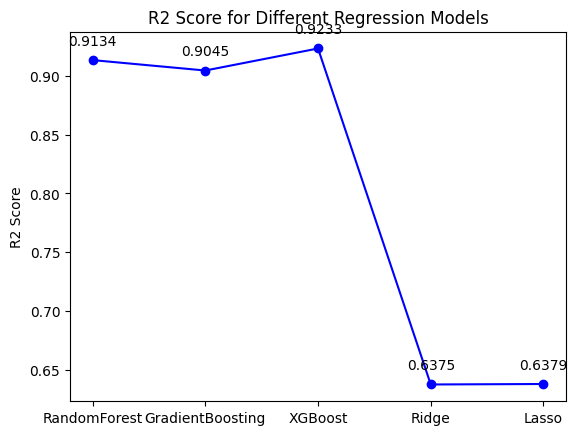

In [ ]:
# Visualize the results using a line graph
fig, ax = plt.subplots()
line = ax.plot(model_names, r2_scores, marker='o', linestyle='-', color='blue')

# Add labels and title
ax.set_ylabel('R2 Score')
ax.set_title('R2 Score for Different Regression Models')

# Add text labels above the points
for name, score in zip(model_names, r2_scores):
    ax.text(name, score + 0.01, f'{score:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()


In [ ]:
# Add labels and title
ax.set_ylabel('R2 Score')
ax.set_title('R2 Score for Different Regression Models')

Text(0.5, 1.0, 'R2 Score for Different Regression Models')

In [ ]:
# Add text labels above the bars
for bar, r2_score in zip(bars, r2_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{r2_score:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()

NameError: ignored